In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime,timedelta

In [3]:
customer_acquisition=pd.read_csv('Customer Acqusition.csv')

In [4]:
spend_data=pd.read_csv('spend.csv')

In [5]:
repayment_data=pd.read_csv('Repayment.csv')

In [6]:
repayment_data.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [7]:
#Drop the unnamed columns,SL No from repayment_data 

In [8]:
repayment_data.drop(['Unnamed: 4','SL No:'],axis=1,inplace=True)

In [9]:
#drop the rows which contain missing values
repayment_data.dropna(axis=0,inplace=True)

In [10]:
#change the type of month column from object to datetime
repayment_data['Month']=repayment_data['Month'].apply(lambda x:pd.to_datetime(x))

In [11]:
repayment_data.head()

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88


In [12]:
spend_data.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [13]:
spend_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
Sl No:      1500 non-null int64
Customer    1500 non-null object
Month       1500 non-null object
Type        1500 non-null object
Amount      1500 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [14]:
#drop the column SI No
spend_data.drop('Sl No:',axis=1,inplace=True)

In [15]:
#Change the type of Month Column from object to datetime
spend_data['Month']=spend_data['Month'].apply(lambda x:pd.to_datetime(x))

In [16]:
spend_data.head()

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47
4,A1,2005-01-17,CAMERA,369694.07


In [17]:
spend_data.isnull().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [18]:
customer_acquisition.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [19]:
customer_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
No          100 non-null int64
Customer    100 non-null object
Age         100 non-null int64
City        100 non-null object
Product     100 non-null object
Limit       100 non-null float64
Company     100 non-null object
Segment     100 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 6.3+ KB


In [20]:
#drop the No Column from acquisition table
customer_acquisition.drop('No',axis=1,inplace=True)

In [21]:
customer_acquisition.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


### 1. In the above dataset,

#### a. In case age is less than 18, replace it with mean of age values.

In [37]:
customer_acquisition.loc[(customer_acquisition.Age<18),'Age']=customer_acquisition.Age.mean()

#### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [38]:
Customer_Spend_Transaction=pd.merge(left=customer_acquisition,right=spend_data,on='Customer')

In [39]:
Customer_Spend_Transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 10 columns):
Customer    1500 non-null object
Age         1500 non-null float64
City        1500 non-null object
Product     1500 non-null object
Limit       1500 non-null float64
Company     1500 non-null object
Segment     1500 non-null object
Month       1500 non-null datetime64[ns]
Type        1500 non-null object
Amount      1500 non-null float64
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 128.9+ KB


In [40]:
Customer_Spend_Transaction.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07


In [50]:
Customer_Spend_Transaction['Amount']=np.where(Customer_Spend_Transaction.Amount>Customer_Spend_Transaction.Limit,Customer_Spend_Transaction.Limit/2,Customer_Spend_Transaction.Amount)

In [52]:
Customer_Spend_Transaction.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07


####  c. Incase the repayment amount is more than the limit, replace the repayment with the limit. 

In [53]:
Customer_Repayment_Transaction=pd.merge(left=customer_acquisition,right=repayment_data,on='Customer')

In [54]:
Customer_Repayment_Transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 9 columns):
Customer    1500 non-null object
Age         1500 non-null float64
City        1500 non-null object
Product     1500 non-null object
Limit       1500 non-null float64
Company     1500 non-null object
Segment     1500 non-null object
Month       1500 non-null datetime64[ns]
Amount      1500 non-null float64
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 117.2+ KB


In [55]:
Customer_Repayment_Transaction.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88


In [56]:
Customer_Repayment_Transaction['Amount']=np.where(Customer_Repayment_Transaction.Amount>Customer_Repayment_Transaction.Limit,Customer_Repayment_Transaction.Limit,Customer_Repayment_Transaction.Amount)

In [57]:
Customer_Repayment_Transaction.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88


### 2. From the above dataset create the following summaries:

####  a. How many distinct customers exist?

In [63]:
Customer_Spend_Transaction['Customer'].drop_duplicates().count()

100

In [60]:
Customer_Repayment_Transaction['Customer'].drop_duplicates().count()

100

The count of distinct customers is 100.

#### b. How many distinct categories exist?

In [66]:
Customer_Spend_Transaction['Product'].drop_duplicates()

0         Gold
18      Silver
29    Platimum
Name: Product, dtype: object

In [65]:
Customer_Repayment_Transaction['Product'].drop_duplicates()

0         Gold
18      Silver
29    Platimum
Name: Product, dtype: object

####  c. What is the average monthly spend by customers? 

In [68]:
Customer_Spend_Amount=Customer_Spend_Transaction.groupby(['Customer','Month'])[['Amount']].mean().reset_index()

In [69]:
Customer_Spend_Amount['Spend_Month']=Customer_Spend_Amount['Month'].apply(lambda x:x.month)

In [70]:
AvgMonthlySpend=Customer_Spend_Amount.groupby(['Customer','Spend_Month'])[['Amount']].mean().reset_index()

In [72]:
AvgMonthlySpend.head(20)

,Customer,Spend_Month,Amount
0,A1,1,341332.877000
1,A1,2,138421.151250
2,A1,4,261649.250000
3,A1,5,361141.310000
4,A1,8,344372.100000
5,A1,10,244534.680000
6,A1,11,183839.610000
7,A10,1,173828.282500
8,A10,2,170265.770000
9,A10,3,134631.266667


####   d. What is the average monthly repayment by customers?

In [74]:
Customer_Repayment_Amount=Customer_Repayment_Transaction.groupby(['Customer','Month'])[['Amount']].mean().reset_index()

In [75]:
Customer_Repayment_Amount['Repayment_Month']=Customer_Repayment_Amount['Month'].apply(lambda x:x.month)

In [76]:
AvgMonthlyRepayment=Customer_Repayment_Amount.groupby(['Customer','Repayment_Month'])[['Amount']].mean().reset_index()

In [78]:
AvgMonthlyRepayment.head(20)

,Customer,Repayment_Month,Amount
0,A1,1,325723.331000
1,A1,2,137713.785000
2,A1,4,254474.580000
3,A1,7,297176.740000
4,A1,9,186427.500000
5,A1,11,285729.090000
6,A10,1,283324.721667
7,A10,2,217344.503333
8,A10,3,240130.543333
9,A10,4,120467.322500


####   e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [110]:
AvgMonthlyCustomers=pd.merge(left=AvgMonthlySpend,right=AvgMonthlyRepayment,left_on=['Customer','Spend_Month'],right_on=['Customer','Repayment_Month'])

In [112]:
AvgMonthlyCustomers['Monthly_Profit']=AvgMonthlyCustomers.Amount_y-AvgMonthlyCustomers.Amount_x

In [113]:
AvgMonthlyCustomers['Profit']=np.where(AvgMonthlyCustomers['Monthly_Profit']>0,AvgMonthlyCustomers['Monthly_Profit']*2.9/100,np.nan)

In [115]:
AvgMonthlyCustomers.head(20)

,Customer,Spend_Month,Amount_x,Repayment_Month,Amount_y,Monthly_Profit,Profit
0,A1,1,341332.877000,1,325723.331000,-15609.546000,NaN
1,A1,2,138421.151250,2,137713.785000,-707.366250,NaN
2,A1,4,261649.250000,4,254474.580000,-7174.670000,NaN
3,A1,11,183839.610000,11,285729.090000,101889.480000,2954.794920
4,A10,1,173828.282500,1,283324.721667,109496.439167,3175.396736
5,A10,2,170265.770000,2,217344.503333,47078.733333,1365.283267
6,A10,3,134631.266667,3,240130.543333,105499.276667,3059.479023
7,A10,4,270721.680000,4,120467.322500,-150254.357500,NaN
8,A10,5,189207.392500,5,98672.695000,-90534.697500,NaN
9,A10,7,239798.030000,7,358194.650000,118396.620000,3433.501980


####  f. What are the top 5 product types?

In [143]:
Customer_Spend_Transaction.groupby('Type').Amount.sum().reset_index().sort_values('Amount',ascending=False)

,Type,Amount
10,PETRO,28597384.98
4,CAMERA,27690738.44
7,FOOD,20519243.60
0,AIR TICKET,20155847.12
14,TRAIN TICKET,19995825.72
13,SHOPPING,17106660.97
3,BUS TICKET,16279935.35
9,MOVIE TICKET,13001899.29
6,CLOTHES,12302511.36
11,RENTAL,11850628.72


####   g. Which city is having maximum spend?

In [144]:
Customer_Spend_Transaction.groupby('City').Amount.sum().reset_index().sort_values('Amount',ascending=False)

,City,Amount
4,COCHIN,45963513.50
2,CALCUTTA,41108132.30
0,BANGALORE,40461647.02
1,BOMBAY,28603127.38
3,CHENNAI,22128635.65
7,TRIVANDRUM,15337155.87
6,PATNA,15260586.97
5,DELHI,10918286.54


####  h. Which age group is spending more money? 

In [140]:
Customer_Spend_Transaction['Age_Group']=np.where(((Customer_Spend_Transaction.Age.astype(int) >= 18) & (Customer_Spend_Transaction.Age.astype(int) < 25)), 'Youth',np.where(((Customer_Spend_Transaction.Age.astype(int) >= 25) & (Customer_Spend_Transaction.Age.astype(int) < 65)), 'Adult','Senior'))

In [145]:
Customer_Spend_Transaction.groupby('Age_Group').Amount.sum()

Age_Group
Adult     1.674181e+08
Senior    3.768249e+07
Youth     1.468050e+07
Name: Amount, dtype: float64

#### i. Who are the top 10 customers in terms of repayment?

In [149]:
Customer_Repayment_Transaction.groupby('Customer').Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

,Customer,Amount
58,A61,10539142.91
57,A60,9876290.74
5,A13,9572000.66
38,A43,8489871.46
40,A45,8448334.87
4,A12,8334760.16
6,A14,7943268.63
39,A44,7744730.12
33,A39,7622483.30
37,A42,7615460.86


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [151]:
Customer_Spend_Transaction['Yearly_Spend']=Customer_Spend_Transaction['Month'].apply(lambda x:x.year)

In [168]:
City_Wise_Data = pd.pivot_table(data = Customer_Spend_Transaction, index = 'City', columns=['Product','Yearly_Spend'], 
               values='Amount', aggfunc='sum')

In [174]:
City_Wise_Data

Product             Gold                              Platimum              \
Yearly_Spend        2004         2005         2006        2004        2005   
City                                                                         
BANGALORE     9289878.54  12892362.99  12030611.09  1112732.30   912284.97   
BOMBAY        6987853.53   8983018.28   7917144.31   897264.94   711804.94   
CALCUTTA      7477140.98  10303355.80  11167532.77  2037690.30  4434696.31   
CHENNAI       1059618.50   3740945.58   2704288.62  3535652.38  5053956.32   
COCHIN        7315850.15  12110613.03  10499142.38  3419904.07  4960921.71   
DELHI         2806495.00   1964845.27   2957103.32   283512.89   494157.86   
PATNA         2072567.90   3252615.77   2276181.69  1113069.60  2883231.07   
TRIVANDRUM    2415102.84   1240375.85   2735710.87  2161676.67  3601443.30   

Product                       Silver                         
Yearly_Spend        2006        2004       2005        2006  
City                                                         
BANGALORE      685831.27  1291852.58  830612.34  1415480.94  
BOMBAY         972130.01   532089.03  508988.54  1092833.80  
CALCUTTA      3589606.66   500006.00  440147.06  1157956.42  
CHENNAI       5024923.40   282056.86  377184.49   350009.50  
COCHIN        4920592.29   814229.62  652269.38  1269990.87  
DELHI          176788.72   768172.30  612311.21   854899.97  
PATNA         1256137.65   756684.10  950094.19   700005.00  
TRIVANDRUM    2147403.75   209667.48  269912.99   555862.12

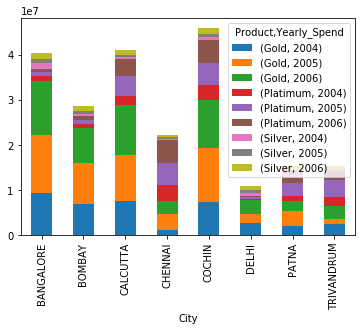

In [175]:
City_Wise_Data.plot(kind='bar',stacked=True)
plt.show()

### 4. Create graphs for

#### a. Monthly comparison of total spends, city wise

In [178]:
Customer_Spend_Transaction['Monthly_Spend']=Customer_Spend_Transaction.Month.apply(lambda x:x.month)

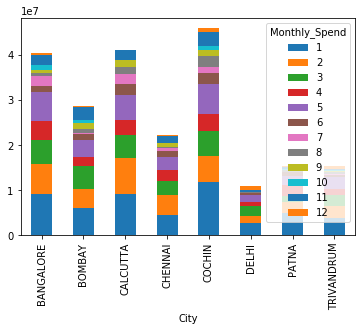

In [183]:
pd.pivot_table(data = Customer_Spend_Transaction, index = 'City', columns='Monthly_Spend', 
               values='Amount', aggfunc='sum').plot(kind='bar',stacked=True)

####  b. Comparison of yearly spend on air tickets

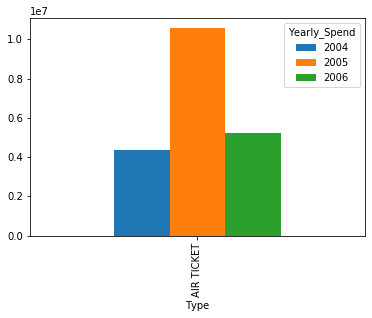

In [188]:
pd.pivot_table(data = Customer_Spend_Transaction[Customer_Spend_Transaction.Type=='AIR TICKET'], index = 'Type', columns='Yearly_Spend', 
               values='Amount', aggfunc='sum').plot(kind='bar')
plt.show()

####  c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

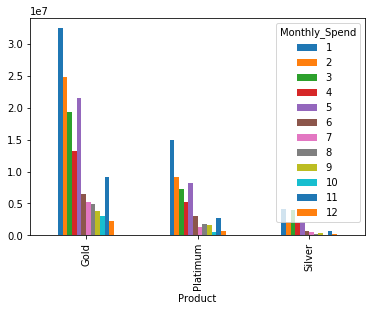

In [190]:
pd.pivot_table(data = Customer_Spend_Transaction, index = 'Product', columns='Monthly_Spend', 
               values='Amount', aggfunc='sum').plot(kind='bar')

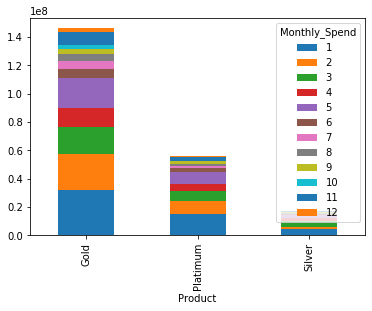

In [191]:
pd.pivot_table(data = Customer_Spend_Transaction, index = 'Product', columns='Monthly_Spend', 
               values='Amount', aggfunc='sum').plot(kind='bar',stacked=True)

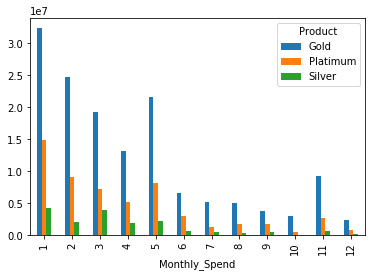

In [193]:
pd.pivot_table(data = Customer_Spend_Transaction, index = 'Monthly_Spend', columns='Product', 
               values='Amount', aggfunc='sum').plot(kind='bar')

### 5. Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [196]:
Customer_Repayment_Transaction['yearly']=Customer_Repayment_Transaction.Month.apply(lambda x:x.year)
Customer_Repayment_Transaction['monthly']=Customer_Repayment_Transaction.Month.apply(lambda x:x.month)

In [205]:
def top10Customers(product_category,time_period):
    return Customer_Repayment_Transaction.loc[(Customer_Repayment_Transaction.Product == product_category)].groupby(['Customer','City','Product',time_period]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

In [211]:
product_category=str(input("Please Enter Product Category and product category should be in Gold/Silver/Platinum: "))
time_period=str(input("Please Enter Time Period and time period should be in yearly/monthly: "))

Please Enter Product Category and product category should be in Gold/Silver/Platinum: Gold
Please Enter Time Period and time period should be in yearly/monthly: yearly


In [212]:
top10Customers_Analysis=top10Customers(product_category,time_period)

In [213]:
top10Customers_Analysis

,Customer,City,Product,yearly,Amount
64,A61,COCHIN,Gold,2005,4276860.55
55,A44,DELHI,Gold,2005,4165317.77
58,A45,COCHIN,Gold,2005,4042447.57
52,A43,BANGALORE,Gold,2005,4006956.60
13,A13,BANGALORE,Gold,2005,3757673.00
65,A61,COCHIN,Gold,2006,3744127.41
61,A60,CALCUTTA,Gold,2005,3742856.10
14,A13,BANGALORE,Gold,2006,3477314.89
38,A29,CALCUTTA,Gold,2006,3434298.00
35,A28,TRIVANDRUM,Gold,2006,3376614.65
